In [29]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from string import punctuation

GREY = '#696969'
GREEN = '#8CD186'

df = pd.read_csv('data/clean_data.csv',keep_default_na=False)

# Samples of punctuation occuring within clues (Using uncleaned data)

In [2]:

def sample_strings_containing(containing:list,  data:pd.DataFrame, column:str, n_samples:int=1) -> dict:
    """Searches a column within a dataframe and returns random smaples of entries containing the key words
    in the given list.

    Args:
        containing (list): List of key words to look for
        data (pd.DataFrame): Dataframe to search
        column (str): column to serch within datdrame
        n_samples (int, optional): number of samples to return for each key. Defaults to 1.

    """
    samples = {}
    for x in containing:
        matches = data[data[column].str.contains(x, regex=False)]
        if matches.shape[0] > 0:  
            samples[x] = []
            for r in np.random.choice(range(matches.shape[0]),n_samples, replace=False):         
                r = np.random.randint(0, matches.shape[0])
                samples[x].append(matches.iloc[r][column])
    return samples

In [31]:

original_df = pd.read_table('data/origin_data.tsv')
original_df = original_df[['clue','answer']]
original_df.dropna(inplace=True)



In [7]:
punctuation_samples = sample_strings_containing(list(punctuation),original_df,'clue',n_samples=5)
pd.DataFrame(punctuation_samples).T

,0,1,2,3,4
!,"'90s ""Cool!""","Brighton ""Bye!""",OMG an insect!,"Subtle ""Over here!""",They're __ again!
"""","Condition once called ""shell shock,"" for short","It means ""peace"" in Russian","Guinness of ""Star Wars""","Best Musical of 1975, with ""The""","Actor Richard of ""A Summer Place"""
#,Welcome comment at a bar #3,#11 on skates,Parental demand #1,Terrible #2s,Yankee Joe whose #6 was retired
$,Arli$$ cable channel,$$$ spitter-outer,"Tested, as on ""The $64,000 Question""",Arli$$ network,"$2.99 a dozen, e.g."
%,50% more,@ # % & *,"Giving it 110%, so to speak",About 8½% of it is mayo,State that voted Republican by the highest per...
&,"Hatcher of ""Lois & Clark""","Tyne's ""Cagney & Lacey"" co-star","Geena's ""Thelma & Louise"" co-star",The B&O et al.,"___, Duncan, Jack & Jane (sitcom)"
',To's companion,Advertiser's urging,Handyman's nickname,"Like Beethoven's ""Pastoral"" Symphony",__'acte
(,Scratch (out),Tangle (with),Up (to),Roman de ___ (2008 French movie),___-tzu (Taoism's founder)
),66 is a well-known one (Abbr.),___ nous (confidentially),D'___ (according to: Fr.),Methods (abbr.),Place of learning (abbr.)
*,*Anthem writer,*1978 Commodores hit,"**Collect, as rewards","*""Aww""-inspiring pairs",M*A*S*H role


# Frequency of Punctuation

In [32]:
def frequency_of_characters(characters:list,data:pd.DataFrame)->dict:
    frequencies = {}
    for character in characters:
        frequencies[character] = data[data['clue'].str.contains(character,regex=False)].shape[0] / data.shape[0]
    return frequencies

In [33]:
punc_freq = frequency_of_characters(punctuation,original_df)

In [36]:
labels = list(punc_freq.keys())
values = list(punc_freq.values())

fig = go.Figure()
trace = go.Bar( x=labels, 
                y=values,
                text=values,
                textposition='auto',
                texttemplate='%{text:1.2%}', 
                marker_color=GREEN,
                textfont_size=10,
                textangle=0
                )

fig.add_trace(trace)

fig.update_layout(width=1600, 
                  height=600,
                  bargap=0.1,
                  plot_bgcolor='white', 
                  title = 'Percentage of clues that contain each form of punctuation (before cleaning)', 
                  font_color = GREY,
                  # margin=dict(l=10, r=10, t=10, b=10)
                  )

fig.update_yaxes(showticklabels=False,showline=False, linewidth=2, linecolor=GREY, gridcolor=GREY,dtick = 0.01)
fig.update_xaxes(showline=True, linewidth=2, linecolor=GREY, showgrid=False)
fig.show()

In [3]:
df.head(3)

,answer,clue,noun_required,fill_blank
0,aba,litigator group,False,False
1,actor,thespian,False,False
2,ades,summer coolers,False,False


# Number of unique clues and answers

In [5]:
proportions = { 'clues':df['clue'].nunique(), 
                'answers': df['answer'].nunique(),
                'clues per answer':df['clue'].nunique() / df['answer'].nunique(),
                'pairings':(df['answer'] + df['clue']).nunique()
              }

print(f"""
      Unique Clues:                       {proportions['clues']} 
      Unique Answers:                     {proportions['answers']}
      Unique Answer + Clue Pairings:      {proportions['pairings']}
      
      Clues per Answer: {proportions['clues per answer']}
      """)





      Unique Clues:                       2579749 
      Unique Answers:                     315116
      Unique Answer + Clue Pairings:      3103325
      
      Clues per Answer: 8.186664593356097
      


In [126]:
labels = [  'Unique Pairings',
            'Unique Clues',
            'Unique Answers'
            ]
values = [  proportions['pairings'],
            proportions['clues'],
            proportions['answers']
            ]

fig = go.Figure()
trace = go.Bar( x=labels, 
                y=values,
                text=values,
                textposition='auto',
                texttemplate='%{text:,}', 
                marker_color=GREEN, 
                )

fig.add_trace(trace)

fig.update_layout(width=600, 
                  height=600,
                  plot_bgcolor='white', 
                  title = 'Number of unique clues and answers in cleaned dataset', 
                  font_color = GREY
                  )

fig.update_yaxes(showline=True, linewidth=2, linecolor=GREY, gridcolor=GREY)
fig.update_xaxes(showline=True, linewidth=2, linecolor=GREY, showgrid=False)
fig.show()

# Frequency of repeated answers

In [168]:
frequencies = { '100+ occurances':    (df['answer'].value_counts() > 100).sum(), 
                '11-100 occurances':  ((df['answer'].value_counts() < 100) & (df['answer'].value_counts() > 10)).sum(),
                '2-10 occurances':     ((df['answer'].value_counts() <= 10) & (df['answer'].value_counts() > 1)).sum(),
                '1 occurance':        (df['answer'].value_counts() == 1).sum()
              }
print(f"""
      Answers with more than 100 occurances:        {frequencies['100+ occurances']}
      Answers with between 11 and 99 occurances:    {frequencies['11-100 occurances']}
      Answers with between 2 and 10 occurances:     {frequencies['2-10 occurances']}
      Answers with only one occurance:              {frequencies['1 occurance']}
      """)




      Answers with more than 100 occurances:        5991
      Answers with between 11 and 99 occurances:    38857
      Answers with between 2 and 10 occurances:     104758
      Answers with only one occurance:              165444
      


In [273]:
labels = list(frequencies.keys())
values = list(frequencies.values())
primary_color = np.array(plotly.colors.hex_to_rgb(GREEN))
colors = ['rgb'+str(tuple(primary_color*1.2)),
          'rgb'+str(tuple(primary_color*1.1)),
          'rgb'+str(tuple(primary_color*1.0)),
          'rgb'+str(tuple(primary_color*0.9))]

fig = go.Figure()
trace = go.Pie( labels=labels, 
                values=values,
                text=values,
                textinfo='label+percent',
                textposition='outside',
                marker_colors=colors,
                hole=0.6 
                )

fig.add_trace(trace)

fig.update_layout(width=600, 
                  height=600,
                  plot_bgcolor='white', 
                  title = 'Frequency of repeated answers', 
                  font_color = GREY
                  )

fig.update_yaxes(showline=True, linewidth=2, linecolor=GREY, gridcolor=GREY)
fig.update_xaxes(showline=True, linewidth=2, linecolor=GREY, showgrid=False)
fig.show()


In [147]:
np.array(plotly.colors.hex_to_rgb(GREEN))


140

In [3]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [10]:
twitter = gensim.downloader.load('glove-twitter-25')
google = gensim.downloader.load('word2vec-google-news-300')
wiki = gensim.downloader.load('glove-wiki-gigaword-100')
model_dict = {'twitter':twitter,
              'google':google,
              'wiki':wiki}

[==================================================] 100.0% 128.1/128.1MB downloaded


In [11]:
glove_twitter_25_vocab = model_dict['twitter'].key_to_index.keys()
df['twitter'] = df['answer'].isin(glove_twitter_25_vocab)
df['twitter'].value_counts(normalize=True)

True     0.781172
False    0.218828
Name: twitter, dtype: float64

In [12]:
glove_twitter_25_vocab = model_dict['google'].key_to_index.keys()
df['google'] = df['answer'].isin(glove_twitter_25_vocab)
df['google'].value_counts(normalize=True)

True     0.708484
False    0.291516
Name: google, dtype: float64

In [13]:
glove_twitter_25_vocab = model_dict['wiki'].key_to_index.keys()
df['wiki'] = df['answer'].isin(glove_twitter_25_vocab)
df['wiki'].value_counts(normalize=True)

True     0.789907
False    0.210093
Name: wiki, dtype: float64

In [15]:
(df['twitter'] | df['wiki'] | df['google']).value_counts(normalize=True)

True     0.840708
False    0.159292
dtype: float64

0.7094338418825149

In [25]:
labels = [  'glove-wiki-gigaword-100',
            'glove-twitter-25',
            'word2vec-google-news-300',
            'all vocabularies combined' 
            ]
values = [  df['wiki'].value_counts(normalize=True)[1], 
            df['twitter'].value_counts(normalize=True)[1],
            df['google'].value_counts(normalize=True)[1],
            (df['twitter'] 
             | df['google'] 
             | df['wiki']).value_counts(normalize=True)[1]]

fig = go.Figure()
trace = go.Bar( x=labels, 
                y=values,
                text=values,
                textposition='auto',
                texttemplate='%{text:0.2%}', 
                marker_color=GREEN, 
                )

fig.add_trace(trace)

fig.update_layout(width=900, 
                  height=600,
                  plot_bgcolor='white', 
                  title = 'Percentage of answers contained in vocabularies of pre-trained word2vec models', 
                  font_color = GREY
                  )

fig.update_yaxes(showline=True, linewidth=2, linecolor=GREY, gridcolor=GREY, range=[0,1],tickformat=".0%")
fig.update_xaxes(showline=True, linewidth=2, linecolor=GREY, showgrid=False)
fig.show()

# Possible Cleaning / Handling Strategies
#### Brainstorming ideas for how to handle the variety of different questions and also clean strings to be readable by algorithm. Bullet points are seperate ideas that might be used individually or in conjunction with some/all of the others



Capital letters not at the start of sentence:
* flag as involving a noun
* flag as requiring a noun
* convert into ____
* use in generating a topic

Numbers:
* remove
* flag as involving number

Single characters:
* remove

Containing "-Across" or "-Down"
* remove from dataset (only of use in a later iteration of model that solve entire puzzle rather than single questions)

!
* Remove
* If at end of sentance, seperate with space and use it as a word otherwise delete

"
* Remove " from string
* Remove text outside of " " 
* Remove text inside of " " but use it for generating a topic as a new value

\#
* Remove

$
* Replace with " money " or something similar
* Remove

%
* Remove

&
* Remove

'
* Remove
* If followed by an 's' remove that too

( )
* Remove

\*

* Remove
* an asterisk at the start of clue might be useful for a later itertion of model that solves entire puzzle rather than a single question

\+

* Remove
* Seperate into multiple questions using + as seperator and create a new clue composed of the solutions of each segment

,

* Remove

\-
* Remove

.	
* Remove

/
* Remove

:
* Remove
* Use text before to generate topic and text after as clue

;
* Remove

<>
* Remove

=
* Remove
* Use text after to generate topic and text before as clue

?
* Remove

@
* Remove

[]
* Remove

\
* Remove

^
* Remove
* Replace with "squared" or something similar

_
* Flag for requiring a blank within sentence
* Remove

`
* Remove
* If double, treat as "

{}
* Remove

|
* Remove

~
* Remove


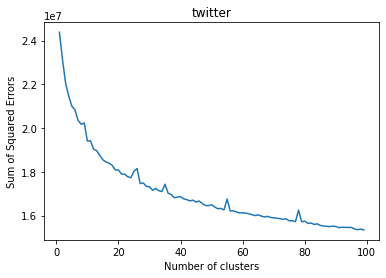

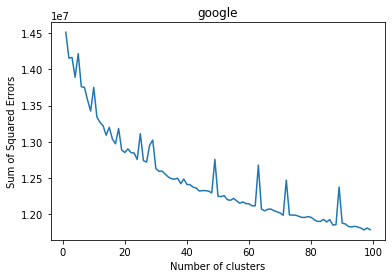

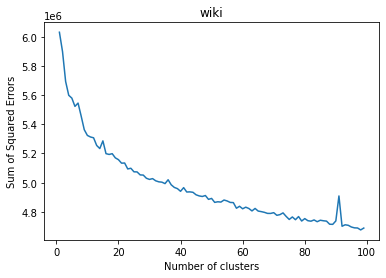

In [42]:
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt

for model_name, model in model_dict.items():

    X = model.vectors
    #print(X)
    data = X

    sse = {}
    for k in range(1, 100):
        kmeans = MiniBatchKMeans(n_clusters=k, max_iter=1000).fit(data)
        #print(data["clusters"])
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of Squared Errors")
    plt.title(model_name)
    plt.show()